---
outline: deep
---

# Data Visualizing

> 数据可视化指的是通过可视化表示来探索数据。它与数据分析紧密相关，而数据分析指的是使用代码来探索数据集的规律和关联

文章涉及两个常用的 `Python package`:

- [Matplotlib](https://matplotlib.org/) 是一个数学绘图库，常被用作数据处理和可视化分析
- [Plotly](https://plotly.com/python/) 包，它生成的图表非常适合在数字设备上显示。

::: details Install matplotlib

通过命令 `python -m pip install --user matplotlib` 直接安装 `matplotlib` 即可

也可以通过创建一个 [虚拟环境](./web-app.md#virtual-environments-and-packages) ，在虚拟环境下直接执行 `pip install matplotlib`

或者 [官方](https://matplotlib.org/stable/users/installing/index.html) 列举的其他方法

:::

## Simple Line Chart

:::details About matpltlib.pyplot

[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

:::

通过如下代码，我们可以通过使用 `matpltlib` 中的 `pyplot` 函数集，快速生成一个简单的折线图

```python
import matplotlib.pyplot as plt

squares = [1, 4, 9, 16, 25]
fig, ax = plt.subplots()
ax.plot(squares)
plt.show()

```

代码 `plot.show()` 用于新建一个图形实例，并展示图表。如果需要保存图标，可以参考 [pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) 将 `plot.show()` 替换为 `plt.savefig('suqares_plot.png', bbox_inches='tight')`。

::: warning

the variable `fig` in the code `fig, ax = plt.subplots()` can not be omitted because the function [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) returns a `tuple` containing a `Figure` and `Axes` object(s). _tuple unpacking_ will make an assignment to `fig` and `ax` respectively with the `Figure` and `Axes` objects. Just like `javascript`, the args can not be omitted or the unpacked variables will mismatch.

If you only want the `Axes` object and don't care about the `Figure`, you could use `_` to ignore the `Figure`

参考 [Tuple Unpacking](index.md#tuple-unpacking)

```python
_, ax = plt.subplots()
```

:::

### Set labels and Line Width

下面对代码进行标签和线条粗细的定制化

```python
import matplotlib.pyplot as plt

squares = [1, 4, 9, 16, 25]
fig, ax = plt.subplots()
ax.plot(squares) # [!code --]
ax.plot(squares, linewidth=3) # [!code ++]
ax.set_title("Square Numbers", fontsize=24) # [!code ++]
# 标签最好使用英文，以防出现文字显示问题
ax.set_xlabel("Value", fontsize=14) # [!code ++]
ax.set_ylabel("Square of Value", fontsize=14) # [!code ++]

# Set size of tick labels.
ax.tick_params(axis='both', labelsize=14) # [!code ++]

plt.show()

```

### Correcting the Figure

仔细观察此时的图形，我们会发现实际上 `x轴` 与 `y轴` 的数据是错位的。在 `x=0` 的位置上 `y=1`，而在最后一个点 `x=4` 的位置上 `y=25`

这是因为根据 [ax.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) , `plot` 方法接收可选的 `x轴` 参数，当只传递了一组数据的时候，`x轴` 的数据为默认为 `range(len(y))`。因此当前图表数据的 `x轴` 数据是默认的 `range(len(squares))`

所以我们只需要指定对应的 `x轴` 数据即可

```python
import matplotlib.pyplot as plt

input_values = [1, 2, 3, 4, 5] # [!code ++]
squares = [1, 4, 9, 16, 25]
fig, ax = plt.subplots()
ax.plot(squares, linewidth=3) # [!code --]
ax.plot(input_values, squares, linewidth=3) # [!code ++]
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(axis="both", labelsize=14)

plt.show()

```

### Set Plot Styles

可以通过 `plt.style.available` 获悉当前系统可使用那些样式，然后通过 `plt.style.use('Solarize_Light2')` 来使用对应的主题

```python
import matplotlib.pyplot as plt

print(plt.style.available)
"""
output: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark',
'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
"""

```


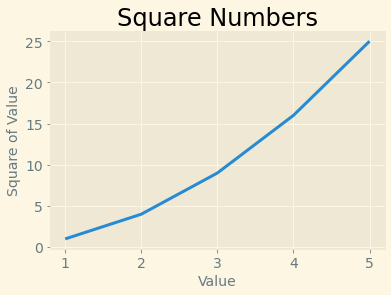

In [1]:
import matplotlib.pyplot as plt

input_values = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]

plt.style.use("Solarize_Light2")
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth=3)
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(axis="both", labelsize=14)

plt.show()



### Scatter

当需要对点进行单独的设置时，散点图 `Scatters` 往往很有用。比如绘制大型数据集时。

要绘制单个点，可使用方法 `scatter()`。具体参数可参考[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

```python
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, ax = plt.subplots()
ax.scatter(2, 4)

plt.show()
```

#### Set scatter style

随后进行图表样式的设置

```python
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, ax = plt.subplots()
# 设置散点图点的大小及颜色
ax.scatter(2, 4) # [!code --]
ax.scatter(2, 4, s=200, c="red") # [!code ++]
# ax.scatter(1, 3, c="blue")

# 设置图表标题并给坐标轴加上标签
ax.set_title("Square Numbers", fontsize=24) # [!code ++]
ax.set_xlabel("Value", fontsize=14) # [!code ++]
ax.set_ylabel("Square of Value", fontsize=14) # [!code ++]

# 设置刻度标记的大小
ax.tick_params(axis='both', which='major', labelsize=14) # [!code ++]

plt.show()
```

#### Set multiple scatters

可以通过传入 `shape(n, )` 的 `list` 绘制多个点。同时可以利用自动计算与 [列表推导](index.md#列表推导式) 快速声明相关联的数据

```python
import matplotlib.pyplot as plt

x_values = range(1, 1001) # [!code ++]
y_values = [v**2 for v in x_values] # [!code ++]

plt.style.use("seaborn")
fig, ax = plt.subplots()
ax.scatter(2, 4, s=200, c="red") # [!code --]
ax.scatter(x_values, y_values, s=10, c="red") # [!code ++]

# 设置图表标题并给坐标轴加上标签
--snip--
# 设置每个坐标轴的取值范围
ax.axis([0, 1100, 0, 1100000])

```

#### Set Color Map

除了手动设置颜色 `c='red'` 外，`pyplot` 内置了一组颜色映射，可以通过传入数组并指定颜色集，动态赋予散点图颜色。要使用这些颜色映射，需要告诉 `pyplot` 如何设置数据集中的颜色。

```python
import matplotlib.pyplot as plt

x_values = range(1, 1001)
y_values = [x**2 for x in x_values]

ax.scatter(x_values, y_values, s=10, c="red") # [!code --]
ax.scatter(x_values, y_values, c=y_values, cmap=plt.cm.Reds, s=10) # [!code ++]

# 设置图表标题并给坐标轴加上标签。
--snip--
```


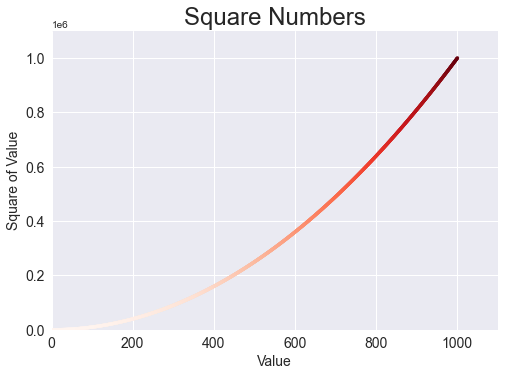

In [5]:
import matplotlib.pyplot as plt

x_values = range(1, 1001)
y_values = [v**2 for v in x_values]
plt.style.use("seaborn")
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s=10, c=y_values, cmap=plt.cm.Reds)


# 设置图表标题并给坐标轴加上标签
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# 设置刻度标记的大小
ax.tick_params(axis="both", which="major", labelsize=14)

# 设置每个坐标轴的取值范围
ax.axis([0, 1100, 0, 1100000])
# plt.show()
plt.savefig("test.png", bbox_inches="tight")